<a href="https://colab.research.google.com/github/anko191/Python_Kaggle/blob/master/scikit/scikit_learn_SVM_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

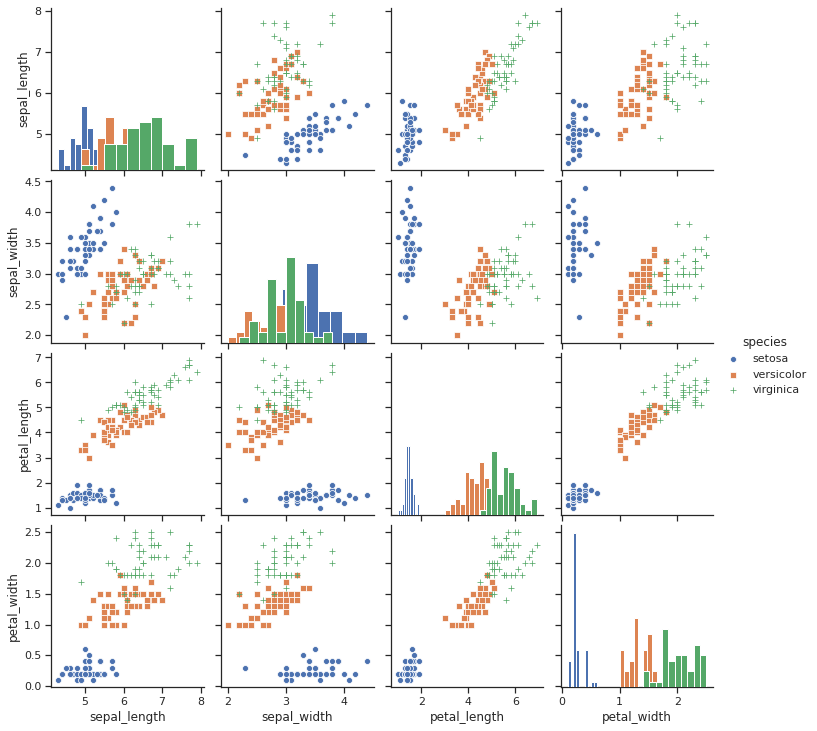

In [ ]:
import seaborn as sns
sns.set(style="ticks")
df = sns.load_dataset("iris")
sns.pairplot(df, hue = 'species', markers=["o", "s", "+"],diag_kind = 'hist' ) # default diaf_kind = 'kde'?

In [ ]:
import pandas as pd
from sklearn import datasets, model_selection, svm, metrics

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
iris_data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
iris_label = pd.Series(data=iris.target)

In [ ]:
print(iris_label.head())

0    0
1    0
2    0
3    0
4    0
dtype: int64


In [ ]:
pd.options.display.max_columns = 50

In [ ]:
data_train, data_test, label_train, label_test = model_selection.train_test_split(iris_data, iris_label)
print(data_train.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
27                 5.2               3.5                1.5               0.2
33                 5.5               4.2                1.4               0.2
123                6.3               2.7                4.9               1.8
72                 6.3               2.5                4.9               1.5
24                 4.8               3.4                1.9               0.2


In [ ]:
print(label_train.head())

27     0
33     0
123    2
72     1
24     0
dtype: int64


In [ ]:
print(len(data_train), len(data_test))

112 38


In [ ]:
clf = svm.SVC()
clf.fit(data_train, label_train)
pre = clf.predict(data_test)

In [ ]:
print(pre)

[2 0 0 1 2 2 1 2 0 0 1 0 2 2 1 1 0 1 0 1 1 2 1 1 2 0 1 1 1 2 0 2 2 2 1 1 1
 1]


In [ ]:
# result confirm
ac_score = metrics.accuracy_score(label_test, pre)
print(ac_score)

0.9210526315789473


In [ ]:
from sklearn import datasets, model_selection, svm, metrics
mnist = datasets.fetch_openml('mnist_784', version = 1, data_home = "/content/") # insted of fetch_mldata
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


In [ ]:
mnist_data = mnist.data / 255
mnist_label = mnist.target

In [ ]:
print(mnist_data.shape)

(70000, 784)


In [ ]:
mnist_label.shape

(70000,)

In [ ]:
train_size = 500
test_size = 100
data_train, data_test, label_train, label_test = model_selection.train_test_split(mnist_data,mnist_label, test_size=test_size, train_size = train_size)

In [ ]:
clf = svm.SVC()
clf.fit(data_train, label_train)
pre = clf.predict(data_test)
ac_score = metrics.accuracy_score(label_test, pre)
print(ac_score)

0.81


In [ ]:
import timeit

num = 10

train_size = 500
test_size = 100
data_train, data_test, label_train, label_test = model_selection.train_test_split(mnist_data, mnist_label, test_size=test_size, train_size=train_size)


In [ ]:
clf = svm.SVC()
print(timeit.timeit(lambda:clf.fit(data_train, label_train), number = num) / num)
pre = clf.predict(data_test)
ac_score = metrics.accuracy_score(label_test, pre)
print(ac_score)


0.39152185539996937
0.87


In [ ]:
clf = svm.LinearSVC()
print(timeit.timeit(lambda:clf.fit(data_train, label_train), number = num) / num)
pre = clf.predict(data_test)
ac_score = metrics.accuracy_score(label_test, pre)
print(ac_score)


0.11365929789999427
0.78


In [ ]:
train_size = 10000
test_size = 1000
data_train, data_test, label_train, label_test = model_selection.train_test_split(mnist_data, mnist_label, test_size = test_size, train_size = train_size)


In [ ]:
clf = svm.LinearSVC()
print(timeit.timeit(lambda:clf.fit(data_train,label_train), number=num)/num)
pre = clf.predict(data_test)
ac_score = metrics.accuracy_score(label_test, pre)
print(ac_score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

6.06184649099996
0.896


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
# どのようにご分類されたかを確認
co_mat = metrics.confusion_matrix(label_test, pre)
print(co_mat)

[[ 83   0   1   0   0   1   1   0   1   0]
 [  0 106   0   1   2   1   0   0   1   0]
 [  2   1  75   2   0   1   1   3   3   0]
 [  0   0   3  93   0   6   0   0   2   3]
 [  0   0   2   0 111   0   0   0   1   4]
 [  2   0   0   4   1  86   3   0   4   0]
 [  0   0   2   0   0   4 101   0   0   0]
 [  2   1   0   0   3   1   0  98   0   1]
 [  1   5   1   4   2   6   3   1  71   1]
 [  0   0   0   2   4   0   0   3   0  72]]


In [ ]:
import scipy.stats
l = [0,1,2,3,4]
print(l)

[0, 1, 2, 3, 4]


In [ ]:
print(scipy.stats.zscore(l))

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [ ]:
print(scipy.stats.zscore(l, ddof = 1))

[-1.26491106 -0.63245553  0.          0.63245553  1.26491106]


In [ ]:
l_2d = [[0,1,2], [3,4,5], [6,7,8]]
print(l_2d)
print(scipy.stats.zscore(l_2d))

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [ ]:
print(scipy.stats.zscore(l_2d, axis = 1))
print(scipy.stats.zscore(l_2d, axis = 1, ddof = 1))

[[-1.22474487  0.          1.22474487]
 [-1.22474487  0.          1.22474487]
 [-1.22474487  0.          1.22474487]]
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]


In [ ]:
print(scipy.stats.zscore(l_2d, axis = None))
print(scipy.stats.zscore(l_2d, axis = None, ddof = 1))

[[-1.54919334 -1.161895   -0.77459667]
 [-0.38729833  0.          0.38729833]
 [ 0.77459667  1.161895    1.54919334]]
[[-1.46059349 -1.09544512 -0.73029674]
 [-0.36514837  0.          0.36514837]
 [ 0.73029674  1.09544512  1.46059349]]


In [ ]:
from sklearn import preprocessing
l = [0,1,2,3,4]
print(l)

[0, 1, 2, 3, 4]


In [ ]:
l_2d = [[0,1,2], [3,4,5], [6,7,8]]
print(l_2d)

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]


In [ ]:
mm = preprocessing.MinMaxScaler()
l_2d_min_max = mm.fit_transform(l_2d)
print(l_2d_min_max)

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [ ]:
l

[0, 1, 2, 3, 4]

In [ ]:
print(preprocessing.minmax_scale(l))

[0.   0.25 0.5  0.75 1.  ]


In [ ]:
print(preprocessing.minmax_scale(l_2d))


[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [ ]:
print(preprocessing.minmax_scale(l_2d, axis = 1))

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.  0.5 1. ]]


In [ ]:
ss = preprocessing.StandardScaler()
l_2d_standardization = ss.fit_transform(l_2d)
print(l_2d_standardization)

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [ ]:
print(preprocessing.scale(l))

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [ ]:
print(preprocessing.scale(l_2d))

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [ ]:
print(preprocessing.scale(l_2d, axis = 1))

[[-1.22474487  0.          1.22474487]
 [-1.22474487  0.          1.22474487]
 [-1.22474487  0.          1.22474487]]


In [ ]:
import statistics
import pprint
l = [0,1,2,3,4]
print(l)
def min_max(l):
    l_min = min(l)
    l_max = max(l)
    return [(i - l_min)/(l_max - l_min) for i in l]
print(min_max(l))

[0, 1, 2, 3, 4]
[0.0, 0.25, 0.5, 0.75, 1.0]


In [ ]:
def standardization(l):
    l_mean = statistics.mean(l)
    l_stdev = statistics.stdev(l)
    return [(i - l_mean) / l_stdev for i in l]
pprint.pprint(standardization(l))

[-1.2649110640673518,
 -0.6324555320336759,
 0.0,
 0.6324555320336759,
 1.2649110640673518]


In [ ]:
def standardization_p(l):
    l_mean = statistics.mean(l)
    l_pstdev = statistics.pstdev(l)
    return [(i - l_mean) / l_pstdev for i in l]
pprint.pprint(standardization_p(l))

[-1.414213562373095,
 -0.7071067811865475,
 0.0,
 0.7071067811865475,
 1.414213562373095]


In [ ]:
l_2d = [[0,1,2], [3,4,5], [6,7,8]]
print(l_2d)
pprint.pprint([min_max(l_1d) for l_1d in l_2d], width = 40)

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]
[[0.0, 0.5, 1.0],
 [0.0, 0.5, 1.0],
 [0.0, 0.5, 1.0]]


In [ ]:
pprint.pprint([standardization(l_1d) for l_1d in l_2d], width = 40)

[[-1.0, 0.0, 1.0],
 [-1.0, 0.0, 1.0],
 [-1.0, 0.0, 1.0]]


In [ ]:
pprint.pprint([standardization_p(l_1d) for l_1d in l_2d])

[[-1.224744871391589, 0.0, 1.224744871391589],
 [-1.224744871391589, 0.0, 1.224744871391589],
 [-1.224744871391589, 0.0, 1.224744871391589]]


In [ ]:
l_2d_min_max_col = list(zip(*[min_max(l_1d) for l_1d in list(zip(*l_2d))]))

In [ ]:
def min_max_2d_all(l_2d):
    l_flatten = sum(l_2d, [])
    l_2d_min = min(l_flatten)
    l_2d_max = max(l_flatten)
    return [[(i - l_2d_min) / (l_2d_max - l_2d_min) for i in l_1d]
            for l_1d in l_2d]


In [ ]:
pprint.pprint(min_max_2d_all(l_2d), width = 40)

[[0.0, 0.125, 0.25],
 [0.375, 0.5, 0.625],
 [0.75, 0.875, 1.0]]


In [ ]:
def standardization_p_2d_all(l):
    l_flatten = sum(l_2d, [])
    print(l_flatten)
    l_2d_mean = statistics.mean(l_flatten)
    l_2d_pstdev = statistics.pstdev(l_flatten)
    return [[(i-l_2d_mean)/ l_2d_pstdev for i in l_1d] for l_1d in l_2d]

In [ ]:
pprint.pprint(standardization_p_2d_all(l_2d))

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[[-1.5491933384829668, -1.161895003862225, -0.7745966692414834],
 [-0.3872983346207417, 0.0, 0.3872983346207417],
 [0.7745966692414834, 1.161895003862225, 1.5491933384829668]]


In [ ]:
l_2d

[[0, 1, 2], [3, 4, 5], [6, 7, 8]]

In [ ]:
import numpy as np
import scipy.stats
from sklearn import preprocessing
a = np.array([0,1,2,3,4])
print(a)

[0 1 2 3 4]


In [ ]:
print((a - a.min()) / (a.max() - a.min()))

[0.   0.25 0.5  0.75 1.  ]


In [ ]:
print((a - a.mean()) / a.std())

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [ ]:
print((a - a.mean()) / a.std(ddof = 1))

[-1.26491106 -0.63245553  0.          0.63245553  1.26491106]


In [ ]:
a_2d = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(a_2d)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [ ]:
def min_max(x, axis = None):
    x_min = x.min(axis = axis, keepdims=True)
    x_max = x.max(axis = axis, keepdims=True)
    return (x-x_min)/(x_max - x_min)
print(min_max(a_2d))

[[0.    0.125 0.25 ]
 [0.375 0.5   0.625]
 [0.75  0.875 1.   ]]


In [ ]:
def standardization(x, axis=None, ddof=0):
    x_mean = x.mean(axis=axis, keepdims=True)
    x_std = x.std(axis=axis, keepdims=True, ddof=ddof)
    return (x - x_mean) / x_std

In [ ]:
print(standardization(a_2d, axis = 0))

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [ ]:
mm = preprocessing.MinMaxScaler()
print(mm.fit_transform(a_2d.astype(float)))

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [ ]:
import pandas as pd
import scipy.stats
from sklearn import preprocessing

df = pd.DataFrame([[0, 1, 2], [3, 4, 5], [6, 7, 8]],
                  columns=['col1', 'col2', 'col3'],
                  index=['a', 'b', 'c'])

print(df)

   col1  col2  col3
a     0     1     2
b     3     4     5
c     6     7     8


In [ ]:
print((df-df.values.min()) / (df.values.max() - df.values.min()))

    col1   col2   col3
a  0.000  0.125  0.250
b  0.375  0.500  0.625
c  0.750  0.875  1.000


In [ ]:
df_ = df.copy()
s = df_['col1']
df_['col1_min_max'] = (s - s.min()) / (s.max() - s.min())
df_['col1_standardization'] = (s - s.mean()) / s.std()

print(df_)

   col1  col2  col3  col1_min_max  col1_standardization
a     0     1     2           0.0                  -1.0
b     3     4     5           0.5                   0.0
c     6     7     8           1.0                   1.0


In [ ]:
print(scipy.stats.zscore(df))

[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


In [ ]:
print(scipy.stats.zscore(df, axis=None, ddof=1))

[[-1.46059349 -1.09544512 -0.73029674]
 [-0.36514837  0.          0.36514837]
 [ 0.73029674  1.09544512  1.46059349]]


In [ ]:
df_standardization = pd.DataFrame(scipy.stats.zscore(df),
                                  index=df.index, columns=df.columns)

print(df_standardization)

       col1      col2      col3
a -1.224745 -1.224745 -1.224745
b  0.000000  0.000000  0.000000
c  1.224745  1.224745  1.224745


In [ ]:
df_ = df.copy()
df_['col1_standardization'] = scipy.stats.zscore(df_['col1'])
print(df_)

   col1  col2  col3  col1_standardization
a     0     1     2             -1.224745
b     3     4     5              0.000000
c     6     7     8              1.224745


In [ ]:
print(preprocessing.minmax_scale(df))

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [ ]:
df_ = df.copy()
s = df_['col1'].astype(float)
df_['col1_min_max'] = preprocessing.minmax_scale(s)
df_['col1_standardization'] = preprocessing.scale(s)

print(df_)

   col1  col2  col3  col1_min_max  col1_standardization
a     0     1     2           0.0             -1.224745
b     3     4     5           0.5              0.000000
c     6     7     8           1.0              1.224745


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
a = np.arange(10)
print(a)
print(train_test_split(a))

[0 1 2 3 4 5 6 7 8 9]
[array([6, 1, 0, 2, 5, 4, 3]), array([8, 7, 9])]


In [ ]:
a_train, a_test = train_test_split(a)
print(a_train)
print(a_test)

[3 5 8 4 9 0 1]
[2 6 7]


In [ ]:
a_train, a_test = train_test_split(a, test_size=0.6)
print(a_train)
print(a_test)

[8 6 0 4]
[9 3 7 2 5 1]


In [ ]:
a_train, a_test = train_test_split(a, test_size = 6)

In [ ]:
print(a_train, a_test)

[8 1 3 4] [0 5 7 6 2 9]


In [ ]:
a_train, a_test = train_test_split(a, test_size = 3, train_size = 4)

In [ ]:
a_train

array([0, 8, 5, 2])

In [ ]:
a_test

array([4, 6, 3])

In [ ]:
a_train, a_test = train_test_split(a, shuffle=False)
print(a_train, a_test)

[0 1 2 3 4 5 6] [7 8 9]


In [ ]:
X = np.arange(20).reshape(2, 10).T
print(X)

[[ 0 10]
 [ 1 11]
 [ 2 12]
 [ 3 13]
 [ 4 14]
 [ 5 15]
 [ 6 16]
 [ 7 17]
 [ 8 18]
 [ 9 19]]


In [ ]:
y = np.arange(10)
print(y)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 5 15]
 [ 0 10]
 [ 7 17]
 [ 4 14]
 [ 9 19]
 [ 1 11]
 [ 2 12]]
[[ 6 16]
 [ 3 13]
 [ 8 18]]
[5 0 7 4 9 1 2]
[6 3 8]


In [ ]:
y = np.array([0] * 5 + [1] * 5)
print(y)

[0 0 0 0 0 1 1 1 1 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 100, stratify=y)
print(y_train)
print(y_test)

[1 1 0 0 0 1 1 0]
[1 0]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()

X = data['data']
y = data['target']
print(X.shape)
print(X[:5])

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
print(X_train.shape)

(112, 4)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)
print(y_test)

[0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
data = load_iris()
X_df = pd.DataFrame(data['data'], columns = data['feature_names'])
y_s = pd.Series(data['target'])

In [ ]:
print(X_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [ ]:
print(y_s)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int64


In [ ]:
X_train_df, X_test_df, y_train_s, y_test_s = train_test_split(X_df, y_s, test_size=0.2, random_state=0, stratify=y_s)

In [ ]:
print(y_train_s.value_counts())
print(y_test_s.value_counts())

2    40
1    40
0    40
dtype: int64
2    10
1    10
0    10
dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[1 4]
 [3 2]]


In [ ]:
print(cm.flatten())

[1 4 3 2]


In [ ]:
tn,fp,fn,tp = cm.flatten()

In [ ]:
print(tn, fp, fn, tp)

1 4 3 2


In [ ]:
y_true_multi = [0,0,0,1,1,1,2,2,2]
y_pred_multi = [0,1,1,1,1,2,2,2,2]
print(confusion_matrix(y_true_multi, y_pred_multi))

[[1 2 0]
 [0 2 1]
 [0 0 3]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


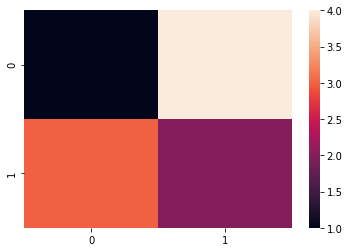

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm)

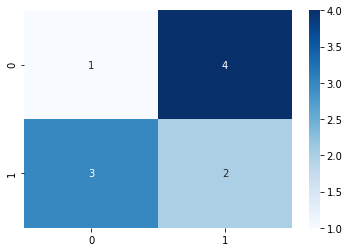

In [ ]:
sns.heatmap(cm, annot = True, cmap='Blues')

In [ ]:
from sklearn.metrics import precision_score
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]
print(precision_score(y_true, y_pred))

0.3333333333333333


In [ ]:
from sklearn.metrics import recall_score
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]
print(recall_score(y_true, y_pred))

0.4


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
y_true = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,1,1,1,0,0,0,1,1]
print(precision_score(y_true, y_pred))

0.3333333333333333


In [ ]:
print(precision_score(y_true, y_pred, pos_label = 0)) # 0 is positive

0.25


In [ ]:
print(precision_score(y_true, y_pred, average=None))

[0.25       0.33333333]


In [ ]:
print(precision_score(y_true, y_pred, average='macro'))
print(precision_score(y_true, y_pred, average='micro'))

0.29166666666666663
0.3


In [ ]:
print(confusion_matrix(y_true, y_pred))

[[1 4]
 [3 2]]


In [ ]:
print(confusion_matrix(y_true, y_pred, labels=[1,0]))

[[2 3]
 [4 1]]


In [ ]:
y_true_ab = ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
y_pred_ab = ['A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B']



In [ ]:
print(precision_score(y_true_ab, y_pred_ab, pos_label='A'))

0.25


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import pprint

y_true = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 0, 0, 0, 1, 1]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.33      0.40      0.36         5

    accuracy                           0.30        10
   macro avg       0.29      0.30      0.29        10
weighted avg       0.29      0.30      0.29        10



In [ ]:
print(classification_report(y_true, y_pred, target_names=['class_0', 'class_1']))

              precision    recall  f1-score   support

     class_0       0.25      0.20      0.22         5
     class_1       0.33      0.40      0.36         5

    accuracy                           0.30        10
   macro avg       0.29      0.30      0.29        10
weighted avg       0.29      0.30      0.29        10



In [ ]:
d = classification_report(y_true, y_pred, output_dict = True)
pprint.pprint(d)

{'0': {'f1-score': 0.22222222222222224,
       'precision': 0.25,
       'recall': 0.2,
       'support': 5},
 '1': {'f1-score': 0.3636363636363636,
       'precision': 0.3333333333333333,
       'recall': 0.4,
       'support': 5},
 'accuracy': 0.3,
 'macro avg': {'f1-score': 0.29292929292929293,
               'precision': 0.29166666666666663,
               'recall': 0.30000000000000004,
               'support': 10},
 'weighted avg': {'f1-score': 0.29292929292929293,
                  'precision': 0.29166666666666663,
                  'recall': 0.3,
                  'support': 10}}


In [ ]:
df = pd.DataFrame(d)
print(df)

                  0         1  accuracy  macro avg  weighted avg
precision  0.250000  0.333333       0.3   0.291667      0.291667
recall     0.200000  0.400000       0.3   0.300000      0.300000
f1-score   0.222222  0.363636       0.3   0.292929      0.292929
support    5.000000  5.000000       0.3  10.000000     10.000000


In [ ]:
print(df.iloc[:, :-3])

                  0         1
precision  0.250000  0.333333
recall     0.200000  0.400000
f1-score   0.222222  0.363636
support    5.000000  5.000000


In [1]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_true = [0,0,0,0,1,1,1,1]
y_score = [0.2, 0.3, 0.6, 0.8, 0.4, 0.5, 0.7, 0.9]
roc = roc_curve(y_true, y_score)
print(len(roc))

3


In [2]:
fpr, tpr, thresholds = roc_curve(y_true, y_score)

In [3]:
fpr

array([0.  , 0.  , 0.25, 0.25, 0.5 , 0.5 , 1.  ])

In [4]:
tpr

array([0.  , 0.25, 0.25, 0.5 , 0.5 , 1.  , 1.  ])

In [5]:
thresholds

array([1.9, 0.9, 0.8, 0.7, 0.6, 0.4, 0.2])

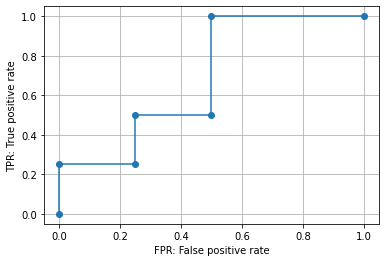

In [6]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

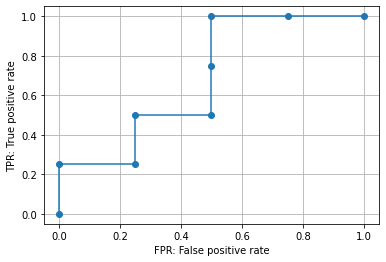

In [8]:
fpr_all, tpr_all, thresholds_all = roc_curve(y_true, y_score, drop_intermediate=False)
plt.plot(fpr_all, tpr_all, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

In [2]:
from sklearn.metrics import roc_curve, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
y_true = np.array([0,0,0,0,1,1,1,1])
y_score = np.array([0.2, 0.3, 0.6, 0.8, 0.4, 0.5, 0.7, 0.9])

In [3]:
print(y_score >= 0.5)
print((y_score >= 0.5).astype(int))

[False False  True  True False  True  True  True]
[0 0 1 1 0 1 1 1]


In [4]:
def fpr_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).flatten()
    return fp / (tn + fp)
print(fpr_score(y_true, y_score >= 0.5))


0.5


In [5]:
print(recall_score(y_true, y_score >= 0.5))

0.75


In [6]:
th_min = min(y_score)
print(th_min)
print((y_score >= th_min).astype(int))
print(fpr_score(y_true, y_score >= th_min))
print(recall_score(y_true, y_score >= th_min))

0.2
[1 1 1 1 1 1 1 1]
1.0
1.0


In [7]:
th_max = max(y_score) + 1
print(th_max)
print((y_score >= th_max).astype(int))
print(fpr_score(y_true, y_score >= th_max))
print(recall_score(y_true, y_score >= th_max))

1.9
[0 0 0 0 0 0 0 0]
0.0
0.0


In [8]:
df = pd.DataFrame({'true':y_true, 'score':y_score})
df['TPR'] = df.apply(lambda row:recall_score(y_true, y_score >= row['score']), axis = 1)
df['FPR'] = df.apply(lambda row:fpr_score(y_true, y_score >= row['score']), axis = 1)
print(df)

   true  score   TPR   FPR
0     0    0.2  1.00  1.00
1     0    0.3  1.00  0.75
2     0    0.6  0.50  0.50
3     0    0.8  0.25  0.25
4     1    0.4  1.00  0.50
5     1    0.5  0.75  0.50
6     1    0.7  0.50  0.25
7     1    0.9  0.25  0.00


In [9]:
print(df.sort_values('score', ascending=False))

   true  score   TPR   FPR
7     1    0.9  0.25  0.00
3     0    0.8  0.25  0.25
6     1    0.7  0.50  0.25
2     0    0.6  0.50  0.50
5     1    0.5  0.75  0.50
4     1    0.4  1.00  0.50
1     0    0.3  1.00  0.75
0     0    0.2  1.00  1.00


In [10]:
fpr_all, tpr_all, th_all = roc_curve(y_true, y_score, drop_intermediate=False)
df_roc = pd.DataFrame({'th_all':th_all, 'tor_all': tpr_all, 'fpr_all':fpr_all})
print(df_roc)

   th_all  tor_all  fpr_all
0     1.9     0.00     0.00
1     0.9     0.25     0.00
2     0.8     0.25     0.25
3     0.7     0.50     0.25
4     0.6     0.50     0.50
5     0.5     0.75     0.50
6     0.4     1.00     0.50
7     0.3     1.00     0.75
8     0.2     1.00     1.00


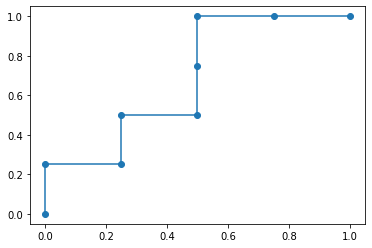

In [11]:
plt.plot(fpr_all,tpr_all,marker='o')

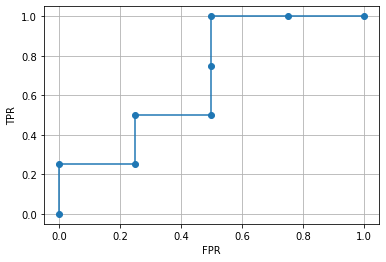

In [12]:
plt.plot(fpr_all,tpr_all,marker='o')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

In [13]:
y_true_perfect = np.array([0,0,0,0,1,1,1,1])
y_score_perfect = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

In [14]:
print(y_true_perfect)
print((y_score_perfect >= 0.5).astype(int))

[0 0 0 0 1 1 1 1]
[0 0 0 0 1 1 1 1]


In [15]:
print(fpr_score(y_true_perfect,y_score_perfect >= 0.5))
print(recall_score(y_true_perfect, y_score_perfect >= 0.5))

0.0
1.0


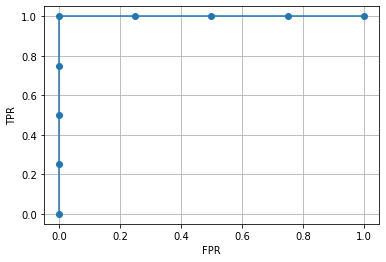

In [16]:
roc_p = roc_curve(y_true_perfect, y_score_perfect, drop_intermediate=False)
plt.plot(roc_p[0], roc_p[1],marker='o')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

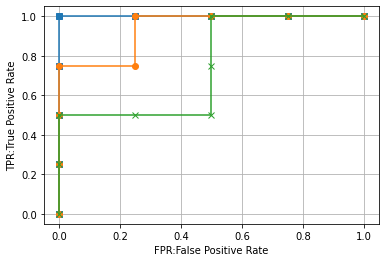

In [17]:
y_true_1 = np.array([0,0,0,1,0,1,1,1])
y_score_1 = y_score_perfect
roc_1 = roc_curve(y_true_1, y_score_1, drop_intermediate=False)
y_true_2 = np.array([0,0,1,1,0,0,1,1])
y_score_2 = y_score_perfect
roc_2 = roc_curve(y_true_2, y_score_2, drop_intermediate=False)
plt.plot(roc_p[0], roc_p[1], marker='s')
plt.plot(roc_1[0], roc_1[1], marker='o')
plt.plot(roc_2[0], roc_2[1], marker='x')
plt.xlabel('FPR:False Positive Rate')
plt.ylabel('TPR:True Positive Rate')
plt.grid()

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]


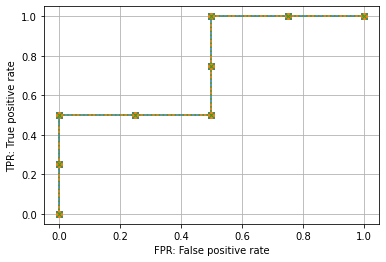

In [18]:
y_true_org = np.array([0, 0, 1, 1, 0, 0, 1, 1])
y_score_org = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

roc_org = roc_curve(y_true_org, y_score_org, drop_intermediate=False)

y_score_scale = y_score_org / 2
print(y_score_scale)
# [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4 ]

roc_scale = roc_curve(y_true_org, y_score_scale, drop_intermediate=False)

y_score_interval = np.array([0.01, 0.02, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96])

roc_interval = roc_curve(y_true_org, y_score_interval, drop_intermediate=False)

plt.plot(roc_org[0], roc_org[1], marker='s')
plt.plot(roc_scale[0], roc_scale[1], marker='o', linestyle='-.')
plt.plot(roc_interval[0], roc_interval[1], marker='x', linestyle=':')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

In [19]:
s = pd.Series(y_score_interval)
print(s)
print(s.rank())

0    0.01
1    0.02
2    0.91
3    0.92
4    0.93
5    0.94
6    0.95
7    0.96
dtype: float64
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
dtype: float64


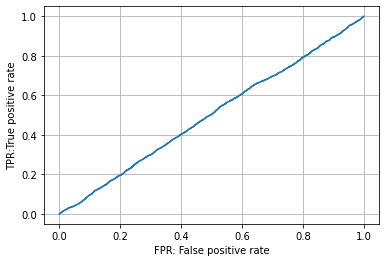

In [20]:
np.random.seed(0)
y_true_random = np.array([0] * 5000 + [1] * 5000)
y_score_random = np.random.rand(10000)
roc_random = roc_curve(y_true_random, y_score_random)
plt.plot(roc_random[0], roc_random[1])
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR:True positive rate')
plt.grid()

In [21]:
from sklearn.metrics import roc_auc_score
import numpy as np

y_true = np.array([0,0,0,0,1,1,1,1])
y_score = np.array([0.2,0.3,0.6,0.8,0.4,0.5,0.7,0.9])

print(roc_auc_score(y_true, y_score))

0.6875


In [22]:
y_true_perfect = np.array([0,0,0,0,1,1,1,1])
y_score_perfect = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
print(roc_auc_score(y_true_perfect, y_score_perfect))


1.0


In [23]:
np.random.seed(0)
y_true_random = np.array([0] * 5000 + [1] * 5000)
y_score_random = np.random.rand(10000)

print(roc_auc_score(y_true_random, y_score_random))

0.49895535999999996
